# Notebook 1: Data Initial Cleaning

Original data obtained from: https://www.kaggle.com/kinguistics/heartbeat-sounds

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# will need this to read wav file
from scipy.io.wavfile import read

### Read in `set_a_df`

Read in the first dataset. The naming convention on the files is different than the one on the in CSV which is used as the data dictionary. 

The following group of cells perform the following operations:
1. Read files and drop unlabeled test set used on Kaggle
2. Define a function `read_in_files` to read in files, ingest their raw audio, and output the raw audio to a dataframe
3. Run the function `read_in_files` on the files in set_a

In [2]:
# Read files and drop unlabeled test set used on Kaggle
set_a_df = pd.read_csv('453_923_bundle_archive/set_a.csv')

# remove unlabeled files within each dataframe, all other files are named in the CSV
# as they are on the hard drive
set_a_df = set_a_df[~set_a_df['label'].isna()]
set_a_df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [8]:
# Define a function `read_in_files` to read in files, ingest their raw audio, 
# and output the raw audio to a dataframe

def read_in_files(file_name_dataframe):
    '''
        This function accepts a dataframe which contains
        file names as well as their labels. It reads in
        the audio files' content and creates a new
        dataframe with the signal in it and the labels
        from the original file
        
        If the signal contains 10,000 measurements, the
        resulting dataframe will have 10,001 columns
        (10,000 measurements + 1 label)
    '''
    
    # Step 1: Find the longest file and its size
    max_size = 0
    for i, row in file_name_dataframe.iterrows():
        file_name = "453_923_bundle_archive/"+row['fname']

        a = read(file_name)
        file_as_array = np.array(a[1],dtype=float)
        if max_size < file_as_array.shape[0]:
            max_size = file_as_array.shape[0]

    
    print(f"Longest file has {max_size} measurements")

    # Step two, create an empty placeholder for 
    # each file, fill in its data, and append it
    # to a list
    list_of_files = []

    for i, row in file_name_dataframe.iterrows():
        file_name = "453_923_bundle_archive/"+row['fname']

        a = read(file_name)
        file_as_array = np.array(a[1],dtype=float)
        if ("noisy" in file_name):
            print("noisy")

        # The placeholder is the same size as the largest file
        # so all resulting rows end up with as many column
        # as the longest file
        placeholder_array = np.zeros((max_size,))
        placeholder_array[-file_as_array.shape[0]:] = file_as_array[:]

        list_of_files.append(placeholder_array)

    # Now we just convert the list of file data into
    # a pandas dataframe

    file_name_as_numbers_dataframe = pd.DataFrame(data=np.array(list_of_files))
    file_name_as_numbers_dataframe['label'] = file_name_dataframe['label']
    return file_name_as_numbers_dataframe


In [9]:
# Run the function `read_in_files` on the files in set_a
set_a_as_number_df = read_in_files(set_a_df)
set_a_as_number_df.head()

Longest file has 396900 measurements


,0,1,2,3,4,5,6,7,8,9,...,396891,396892,396893,396894,396895,396896,396897,396898,396899,label
0,1.0,-3.0,-1.0,-7.0,-9.0,-2.0,-6.0,-5.0,-3.0,4.0,...,10.0,3.0,1.0,-4.0,-5.0,1.0,0.0,1.0,0.0,artifact
1,-2.0,3.0,-4.0,4.0,-3.0,2.0,-1.0,0.0,0.0,0.0,...,9.0,18.0,7.0,6.0,2.0,-6.0,0.0,-7.0,-6.0,artifact
2,6.0,-4.0,-9.0,-1.0,-4.0,1.0,-5.0,2.0,4.0,3.0,...,1.0,7.0,5.0,1.0,2.0,0.0,3.0,2.0,-3.0,artifact
3,-85.0,-198.0,-214.0,-173.0,-177.0,-206.0,-256.0,-274.0,-171.0,-33.0,...,-228.0,-271.0,-277.0,-248.0,-198.0,-166.0,-110.0,-74.0,-76.0,artifact
4,53.0,-35.0,47.0,170.0,340.0,436.0,535.0,639.0,647.0,569.0,...,534.0,440.0,435.0,375.0,238.0,67.0,-37.0,-71.0,32.0,artifact


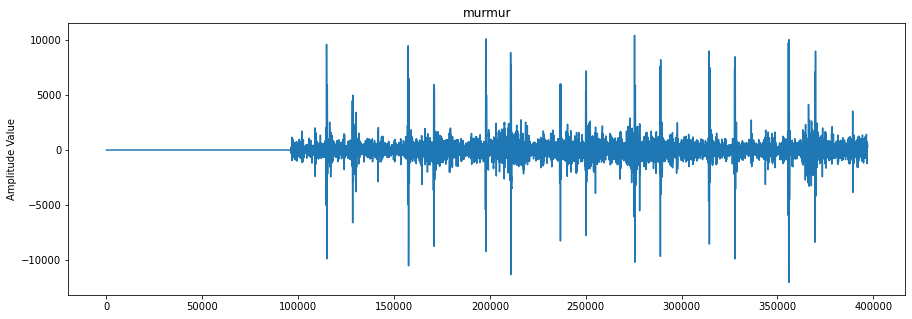

In [10]:
item_number = 63
plt.figure(figsize=(15, 5))
plt.plot(set_a_as_number_df.iloc[item_number, :-1])
plt.title(set_a_as_number_df.iloc[item_number, -1])
plt.ylabel("Amplitude Value")
plt.show()

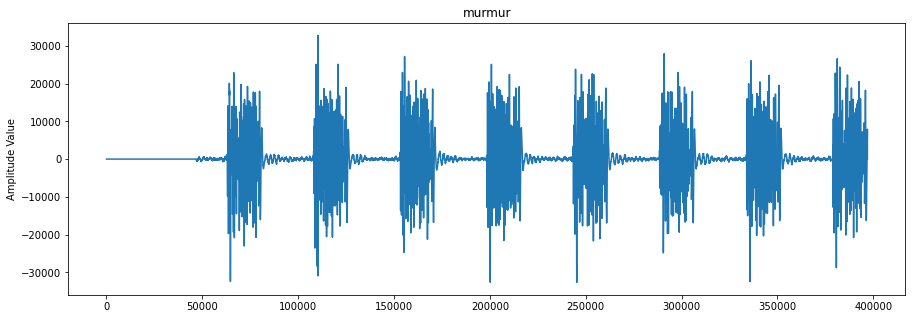

In [11]:
item_number = 83
plt.figure(figsize=(15, 5))
plt.plot(set_a_as_number_df.iloc[item_number, :-1])
plt.title(set_a_as_number_df.iloc[item_number, -1])
plt.ylabel("Amplitude Value")
plt.show()

### Read in `set_b_df`

Read in the second dataset. The naming convention on the files is different than the one on the in CSV which is used as the data dictionary. It's actually worse than in the first dataset so before reading the files we need to clean
the naming in the CSV file.

For example, a file named `Btraining_extrastole_127_1306764300147_C.wav` in the CSV is actually named `extrastole__127_1306764300147_C.wav` on the hard drive

The following group of cells perform the following operations:
1. Read files and drop unlabeled test set used on Kaggle
2. Perform string operations to match names to their filename on the hard drive
3. Run the function `read_in_files` on the files in set_a

In [12]:
# Read files and drop unlabeled test set used on Kaggle
set_b_df = pd.read_csv('453_923_bundle_archive/set_b.csv')
set_b_df = set_b_df[~set_b_df['label'].isna()]
print(set_b_df.shape)

set_b_df.head()

(461, 4)


,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [13]:
# Perform string operations to match names to their filename on the hard drive

set_b_df['fname'] = set_b_df['fname'].str.replace('Btraining_', '')
set_b_df['fname'] = set_b_df['fname'].str.replace('normal_', 'normal__')
set_b_df['fname'] = set_b_df['fname'].str.replace('murmur_', 'murmur__')
set_b_df['fname'] = set_b_df['fname'].str.replace('extrastole_', 'extrastole__')
set_b_df['fname'] = set_b_df['fname'].str.replace('normal__noisynormal__', 'normal_noisynormal_')
set_b_df['fname'] = set_b_df['fname'].str.replace('murmur__noisymurmur__', 'murmur_noisymurmur_')


set_b_df.head()

,dataset,fname,label,sublabel
0,b,set_b/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,set_b/extrastole__128_1306344005749_A.wav,extrastole,NaN
2,b,set_b/extrastole__130_1306347376079_D.wav,extrastole,NaN
3,b,set_b/extrastole__134_1306428161797_C1.wav,extrastole,NaN
4,b,set_b/extrastole__138_1306762146980_B.wav,extrastole,NaN


In [14]:
# Run the function `read_in_files` on the files in set_a
set_b_as_number_df = read_in_files(set_b_df)
set_b_as_number_df.head()

Longest file has 111468 measurements
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy
noisy


,0,1,2,3,4,5,6,7,8,9,...,111459,111460,111461,111462,111463,111464,111465,111466,111467,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1090.0,1290.0,1349.0,1059.0,897.0,1174.0,1244.0,1157.0,4.0,extrastole
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-158.0,-212.0,-257.0,-460.0,-547.0,-535.0,-657.0,-679.0,-693.0,extrastole
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1673.0,1951.0,1890.0,1858.0,1871.0,1533.0,1482.0,1540.0,-7.0,extrastole
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,303.0,251.0,250.0,154.0,213.0,69.0,113.0,68.0,1.0,extrastole
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-328.0,-325.0,-217.0,-309.0,-832.0,-714.0,-232.0,-462.0,-802.0,extrastole


### Combine both dataframes 

Instead of calling the function on each individual dataframe, we can combine the two dataframes back to back and then run the function on the combined result. This will produce a combined dataframe which has all audio files we are working with

In [15]:
set_a_df.head(2)

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN


In [16]:
set_b_df.head(2)

,dataset,fname,label,sublabel
0,b,set_b/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,set_b/extrastole__128_1306344005749_A.wav,extrastole,NaN


Both dataframes have the same structure, so we can attach them head to tail

In [17]:
# Combine the dataframes
combined_df = pd.concat([set_a_df, set_b_df], axis=0)

# Reset the index and then drop the old index
combined_df = combined_df.reset_index(drop=True)
print(combined_df.shape)
combined_df.head()

(585, 4)


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [28]:
folder='453_923_bundle_archive/'

In [42]:
new_df = pd.DataFrame({'signal': np.zeros((1,)) * combined_df.shape[0], 
                       'sampling_rate': np.zeros((combined_df.shape[0],)),
                       'label': combined_df['label']})

ValueError: arrays must all be same length

In [43]:
new_df.head()

,signal,sampling_rate,label
0,[],0.0,artifact
1,[],0.0,artifact
2,[],0.0,artifact
3,[],0.0,artifact
4,[],0.0,artifact


In [44]:
import librosa
y, sr = librosa.load(folder+combined_df.iloc[0]['fname'])

In [46]:
new_df.iloc[0,0] = y

ValueError: Must have equal len keys and value when setting with an iterable

Now read the files from the combined dataframe to create a combine dataset of all measurements for all files in a tabular format. Each column is a measurement of the audio file (i.e. the raw value of the sound), and the final column is the target

In [13]:
combined_as_number_df = read_in_files(combined_df)
combined_as_number_df.head()

Longest file has 396900 measurements


,0,1,2,3,4,5,6,7,8,9,...,396891,396892,396893,396894,396895,396896,396897,396898,396899,label
0,1.0,-3.0,-1.0,-7.0,-9.0,-2.0,-6.0,-5.0,-3.0,4.0,...,10.0,3.0,1.0,-4.0,-5.0,1.0,0.0,1.0,0.0,artifact
1,-2.0,3.0,-4.0,4.0,-3.0,2.0,-1.0,0.0,0.0,0.0,...,9.0,18.0,7.0,6.0,2.0,-6.0,0.0,-7.0,-6.0,artifact
2,6.0,-4.0,-9.0,-1.0,-4.0,1.0,-5.0,2.0,4.0,3.0,...,1.0,7.0,5.0,1.0,2.0,0.0,3.0,2.0,-3.0,artifact
3,-85.0,-198.0,-214.0,-173.0,-177.0,-206.0,-256.0,-274.0,-171.0,-33.0,...,-228.0,-271.0,-277.0,-248.0,-198.0,-166.0,-110.0,-74.0,-76.0,artifact
4,53.0,-35.0,47.0,170.0,340.0,436.0,535.0,639.0,647.0,569.0,...,534.0,440.0,435.0,375.0,238.0,67.0,-37.0,-71.0,32.0,artifact


In [14]:
combined_as_number_df.shape

(585, 396901)

In [15]:
# THIS CELL WILL RUN FOR A VERY LONG TIME
#combined_as_number_df.to_csv('data/audio_as_csv.csv', index=False)

In [16]:
# THIS CELL WILL RUN FOR A VERY LONG TIME
#combined_as_number_df_test = pd.read_csv('data/audio_as_csv.csv')
#combined_as_number_df_test.head()

Writing and reading the dataframe from disk takes much too long. It's better to simply read the individual files and rebuild the dataframe each time.

I will define a function named `read_original_data` and place it in a file called `boris_util.py`

In [17]:
from boris_util import *

In [18]:
combined_file_test = read_original_data('453_923_bundle_archive')
print(combined_file_test.shape)
combined_file_test.head()

Longest file has 396900 measurements
(585, 396901)


,0,1,2,3,4,5,6,7,8,9,...,396891,396892,396893,396894,396895,396896,396897,396898,396899,label
0,1.0,-3.0,-1.0,-7.0,-9.0,-2.0,-6.0,-5.0,-3.0,4.0,...,10.0,3.0,1.0,-4.0,-5.0,1.0,0.0,1.0,0.0,artifact
1,-2.0,3.0,-4.0,4.0,-3.0,2.0,-1.0,0.0,0.0,0.0,...,9.0,18.0,7.0,6.0,2.0,-6.0,0.0,-7.0,-6.0,artifact
2,6.0,-4.0,-9.0,-1.0,-4.0,1.0,-5.0,2.0,4.0,3.0,...,1.0,7.0,5.0,1.0,2.0,0.0,3.0,2.0,-3.0,artifact
3,-85.0,-198.0,-214.0,-173.0,-177.0,-206.0,-256.0,-274.0,-171.0,-33.0,...,-228.0,-271.0,-277.0,-248.0,-198.0,-166.0,-110.0,-74.0,-76.0,artifact
4,53.0,-35.0,47.0,170.0,340.0,436.0,535.0,639.0,647.0,569.0,...,534.0,440.0,435.0,375.0,238.0,67.0,-37.0,-71.0,32.0,artifact
